In [1]:
import pandas as pd
import numpy as np
import tcc_utils

from keras.initializers import glorot_normal as gl_normal, glorot_uniform as gl_uni, RandomUniform as rnd_uni

Using TensorFlow backend.


In [2]:
import tratamento_dados_empresa

x_csv_path = '../data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = '../data/grendene-cotacao-raw.csv'

x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa.get_scaled_splits_and_scaler(
    x_csv_path, y_csv_path, 0.2, 0)

In [3]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
glorot_uniform = gl_uni(seed=0)
random_uniform = rnd_uni(minval=-0.05, maxval=0.05, seed=0)

In [67]:
linear_model = tcc_utils.linear_model(x_train, random_uniform)

<Figure size 576x432 with 0 Axes>

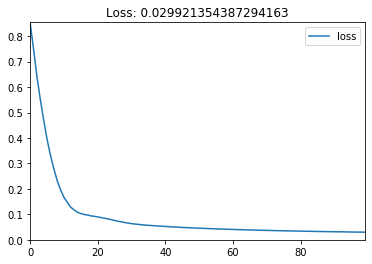

In [68]:
linear_history = linear_model.fit(x_train, y_train, epochs=100, verbose=0)
tcc_utils.plot_loss(linear_history)

<Figure size 576x432 with 0 Axes>

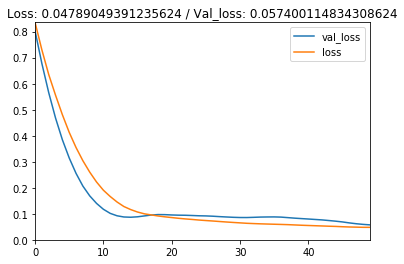

In [66]:
linear_history_with_val = linear_model.fit(x_train, y_train, validation_split=0.2, epochs=50, verbose=0)
tcc_utils.plot_loss_with_validation(linear_history_with_val)

In [69]:
# Evaluating model against Training and Test set
linr_train_eval = linear_model.evaluate(x_train, y_train, verbose=0)
linr_test_eval = linear_model.evaluate(x_test, y_test, verbose=0)
print(f'MSE of training set using Linear model: {linr_train_eval}')
print(f'MSE of testing set using Linear model: {linr_test_eval}')

MSE of training set using Linear model: 0.029790099371563305
MSE of testing set using Linear model: 0.14062665402889252


In [ ]:
X = tratamento_dados_empresa.treat_economatica_indicadores_financeiros(x_csv_path)
tcc_utils.linear_model_weighs_table(linear_model, X)

In [70]:
prediction_results = tcc_utils.prediction_results_data_frame(x_test, y_test, linear_model, y_scaler)
print(prediction_results)

    Prediction      Real     % error
0     6.645180  8.075241   17.709202
1     4.236459  3.669486   15.451017
2     5.058396  4.616062    9.582498
3     2.421391  3.003443   19.379504
4     1.570627  0.667981  135.130483
5     0.953269  0.900556    5.853353
6     5.002497  3.491649   43.270324
7     6.289382  5.156991   21.958384
8     7.004307  8.491036   17.509391
9     4.548274  4.785659    4.960346
10    1.623693  1.377930   17.835625


In [9]:
layers=[32, 16, 8]
activations=['relu', 'relu', 'relu']

deep_model = tcc_utils.deep_model(x_train, glorot_uniform, layers, activations)


<Figure size 576x432 with 0 Axes>

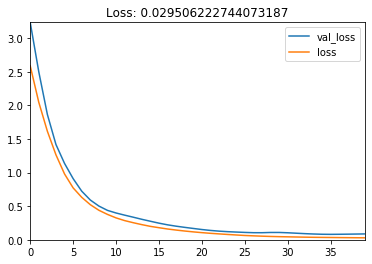

In [10]:
deep_history = deep_model.fit(x_train, y_train, epochs=40, validation_split=0.2, verbose=0)
tcc_utils.plot_loss(deep_history)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 57        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                1824      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 2,497
Trainable p

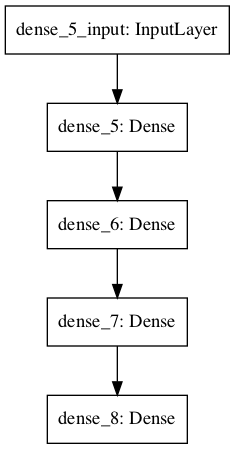

In [13]:
# summarize layers
print(linear_model.summary())
print(deep_model.summary())
# plot graph
from keras.utils import plot_model
# plot_model(deep_model, to_file='multilayer_perceptron_graph.png')
plot_model(deep_model)

    Prediction      Real     % error
4     1.570627  0.667981  135.130483
5     0.953269  0.900556    5.853353
10    1.623693  1.377930   17.835625
3     2.421391  3.003443   19.379504
6     5.002497  3.491649   43.270324
1     4.236459  3.669486   15.451017
2     5.058396  4.616062    9.582498
9     4.548274  4.785659    4.960346
7     6.289382  5.156991   21.958384
0     6.645180  8.075241   17.709202
8     7.004307  8.491036   17.509391


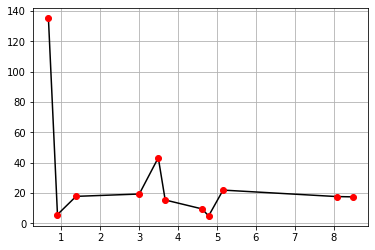

In [71]:
prediction_results = tcc_utils.prediction_results_data_frame(x_test, y_test, linear_model, y_scaler)
prediction_results.sort_values('Real', ascending=True, inplace=True)
print(prediction_results)
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(prediction_results['Real'], prediction_results['% error'], 'k',
        prediction_results['Real'], prediction_results['% error'], 'ro')
plt.yscale('linear')
plt.grid(True)
plt.show()

    Prediction      Real    % error
4     1.067951  0.667981  59.877378
5     0.971516  0.900556   7.879586
10    1.901559  1.377930  38.001049
3     2.835420  3.003443   5.594347
6     4.752436  3.491649  36.108649
1     3.737392  3.669486   1.850567
2     3.237335  4.616062  29.868029
9     5.243757  4.785659   9.572307
7     5.623794  5.156991   9.051848
0     6.965249  8.075241  13.745625
8     7.507805  8.491036  11.579631


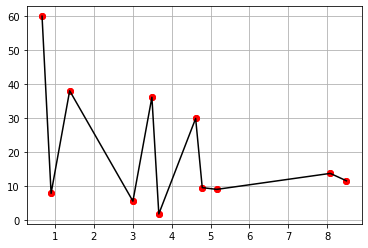

In [51]:
prediction_results = tcc_utils.prediction_results_data_frame(x_test, y_test, deep_model, y_scaler)
prediction_results.sort_values('Real', ascending=True, inplace=True)
print(prediction_results)
plt.plot(prediction_results['Real'], prediction_results['% error'], 'ro')
plt.plot(prediction_results['Real'], prediction_results['% error'], 'ro',
        prediction_results['Real'], prediction_results['% error'], 'k')
#plt.yscale('log')
plt.grid(True)
plt.show()
#plt.scatter('a', 'b', c='c', s='d', data=data)

In [50]:
tcc_utils.plot_compare_histories([linear_history, deep_history])

AttributeError: module 'tcc_utils' has no attribute 'plot_compare_histories'